## 04.- Kernel SVM

### b) Importación de las librería

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### c) Importación del conjunto de datos

In [4]:
dataset = pd.read_csv('SNA.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### d) Dividir el conjunto de datos en el conjunto de entrenamiento y el conjunto de prueba

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
print(X_train)

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  72000]
 [    45  26000]
 [    33  69000]
 [    20  82000]
 [    31  74000]
 [    42  80000]
 [    35  72000]
 [    33 149000]
 [    40  71000]
 [    51 146000]
 [    46  79000]
 [    35  75000]
 [    38  51000]
 [    36  75000]
 [    37  78000]
 [    38  61000]
 [    60 108000]
 [    20  82000]
 [    57  74000]
 [    42  65000]
 [    26  8000

In [7]:
print(y_train)

[0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1
 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 0]


In [8]:
print(X_test)

[[    30  87000]
 [    38  50000]
 [    35  75000]
 [    30  79000]
 [    35  50000]
 [    27  20000]
 [    31  15000]
 [    36 144000]
 [    18  68000]
 [    47  43000]
 [    30  49000]
 [    28  55000]
 [    37  55000]
 [    39  77000]
 [    20  86000]
 [    32 117000]
 [    37  77000]
 [    19  85000]
 [    55 130000]
 [    35  22000]
 [    35  47000]
 [    47 144000]
 [    41  51000]
 [    47 105000]
 [    23  28000]
 [    49 141000]
 [    28  87000]
 [    29  80000]
 [    37  62000]
 [    32  86000]
 [    21  88000]
 [    37  79000]
 [    57  60000]
 [    37  53000]
 [    24  58000]
 [    18  52000]
 [    22  81000]
 [    34  43000]
 [    31  34000]
 [    49  36000]
 [    27  88000]
 [    41  52000]
 [    27  84000]
 [    35  20000]
 [    43 112000]
 [    27  58000]
 [    37  80000]
 [    52  90000]
 [    26  30000]
 [    49  86000]
 [    57 122000]
 [    34  25000]
 [    35  57000]
 [    34 115000]
 [    59  88000]
 [    45  32000]
 [    29  83000]
 [    26  80000]
 [    49  2800

In [9]:
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


### e) Escalado de características

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
print(X_train)

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]
 [-0.30964085 -1.29261101]
 [-0.30964085 -0.5677824 ]
 [ 0.38358493  0.09905991]
 [ 0.8787462  -0.59677555]
 [ 2.06713324 -1.17663843]
 [ 1.07681071 -0.13288524]
 [ 0.68068169  1.78066227]
 [-0.70576986  0.56295021]
 [ 0.77971394  0.35999821]
 [ 0.8787462  -0.53878926]
 [-1.20093113 -1.58254245]
 [ 2.1661655   0.93986109]
 [-0.01254409  1.22979253]
 [ 0.18552042  1.08482681]
 [ 0.38358493 -0.48080297]
 [-0.30964085 -0.30684411]
 [ 0.97777845 -0.8287207 ]
 [ 0.97777845  1.8676417 ]
 [-0.01254409  1.25878567]
 [-0.90383437  2.27354572]
 [-1.20093113 -1.58254245]
 [ 2.1661655  -0.79972756]
 [-1.39899564 -1.46656987]
 [ 0.38358493  2.30253886]
 [ 0.77971394  0.76590222]
 [-1.00286662 -0.30684411]
 [ 0.08648817  0.76590222]
 

In [12]:
print(X_test)

[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]
 [-1.10189888 -1.43757673]
 [-0.70576986 -1.58254245]
 [-0.21060859  2.15757314]
 [-1.99318916 -0.04590581]
 [ 0.8787462  -0.77073441]
 [-0.80480212 -0.59677555]
 [-1.00286662 -0.42281668]
 [-0.11157634 -0.42281668]
 [ 0.08648817  0.21503249]
 [-1.79512465  0.47597078]
 [-0.60673761  1.37475825]
 [-0.11157634  0.21503249]
 [-1.89415691  0.44697764]
 [ 1.67100423  1.75166912]
 [-0.30964085 -1.37959044]
 [-0.30964085 -0.65476184]
 [ 0.8787462   2.15757314]
 [ 0.28455268 -0.53878926]
 [ 0.8787462   1.02684052]
 [-1.49802789 -1.20563157]
 [ 1.07681071  2.07059371]
 [-1.00286662  0.50496393]
 [-0.90383437  0.30201192]
 [-0.11157634 -0.21986468]
 [-0.60673761  0.47597078]
 [-1.6960924   0.53395707]
 [-0.11157634  0.27301877]
 [ 1.86906873 -0.27785096]
 [-0.11157634 -0.48080297]
 [-1.39899564 -0.33583725]
 [-1.99318916 -0.50979612]
 [-1.59706014  0.33100506]
 

### f) Entrenamiento del modelo Kernel SVM en el conjunto de entrenamiento

In [13]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

### g) Predecir un nuevo resultado

In [14]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


### h) Predicción de los resultados del conjunto de pruebas

In [15]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


### i) Hacer la matriz de confusión

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[64  4]
 [ 3 29]]


0.93

### j) Visualización de los resultados del conjunto de entrenamiento

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


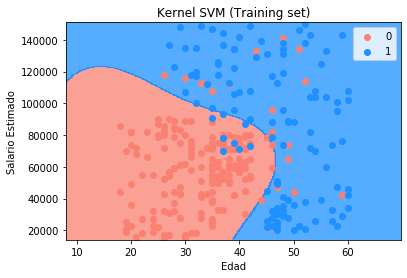

In [17]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Edad')
plt.ylabel('Salario Estimado')
plt.legend()
plt.show()

## Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


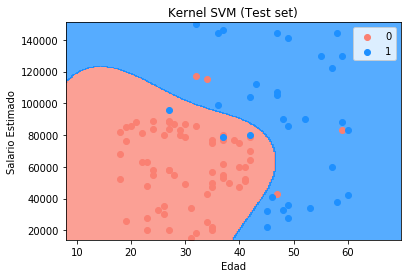

In [18]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Edad')
plt.ylabel('Salario Estimado')
plt.legend()
plt.show()

Las Máquinas de Soporte Vectorial con Kernel (Kernel Support Vector Machines o Kernel SVM) son una extensión de las Máquinas de Soporte Vectorial (SVM) que permiten manejar conjuntos de datos no linealmente separables mediante la aplicación de transformaciones no lineales a un espacio dimensional superior. El uso de funciones de kernel es fundamental en Kernel SVM para lograr esta transformación. A continuación, se proporciona una descripción detallada de Kernel SVM con un enfoque matemático:

### 1. Fundamento del Algoritmo
El objetivo principal de Kernel SVM es encontrar un hiperplano de separación óptimo en un espacio de características de mayor dimensión que permita separar las clases de datos que originalmente no eran linealmente separables en el espacio de características original.

### 2. Funciones de Kernel
Las funciones de kernel son funciones matemáticas que calculan el producto escalar entre dos puntos en el espacio de características de alta dimensión sin necesidad de calcular explícitamente la transformación de los datos a ese espacio de alta dimensión. Algunos ejemplos comunes de funciones de kernel incluyen:

- **Kernel Lineal:** $K(x, x') = x^T x'$, donde $x$ y $x'$ son vectores de características en el espacio de características original.
- **Kernel Polinomial:** $K(x, x') = (x^T x' + c)^d$, donde $c$ es un término constante y $d$ es el grado del polinomio.
- **Kernel Radial (RBF):** $K(x, x') = \exp\left(-\frac{\|x - x'\|^2}{2\sigma^2}\right)$, donde $\sigma$ es un parámetro de suavización.

### 3. Clasificación con Kernel SVM
Para la clasificación, Kernel SVM sigue el mismo principio que SVM tradicionales. Se busca encontrar el hiperplano de separación óptimo en el espacio de características de alta dimensión generado por la función de kernel. El hiperplano se selecciona de tal manera que maximice el margen entre las clases y minimice el error de clasificación.

### 4. Ventajas y Desventajas
- **Ventajas:**
  - Puede manejar datos no linealmente separables mediante la aplicación de funciones de kernel.
  - Efectivo en conjuntos de datos de alta dimensión.
  - Versatilidad en la elección de funciones de kernel para adaptarse a diferentes tipos de datos.
- **Desventajas:**
  - Requiere la selección adecuada de la función de kernel y ajuste de hiperparámetros.
  - Puede ser computacionalmente costoso en conjuntos de datos grandes.
  - La interpretación de los resultados puede ser más compleja debido a la transformación de datos a un espacio de alta dimensión.

### 5. Ejemplo Práctico
Supongamos que tienes un conjunto de datos que contiene información sobre pacientes, incluyendo sus características médicas, y deseas predecir si un paciente tiene una enfermedad específica o no. Si los datos no son linealmente separables en el espacio de características original, puedes aplicar Kernel SVM con una función de kernel adecuada (por ejemplo, el kernel RBF) para lograr una separación óptima y realizar la predicción.

### 6. Resumen
Kernel SVM es una extensión poderosa de SVM que permite el manejo de problemas de clasificación no linealmente separables al transformar los datos en un espacio de características de alta dimensión mediante funciones de kernel. Esta técnica es especialmente útil cuando los datos no pueden separarse linealmente en el espacio de características original y se utiliza ampliamente en aplicaciones de aprendizaje automático.